# Оценка эффекта от внедрения полученного решения

#### Вопрос:
_Постройте простую экономическую модель для оценки эффекта от внедрения полученного решения на практике._

_Например, введите следующие параметры:_

    сколько денег в среднем приносит один пользователь в месяц; 
    сколько денег в среднем вы будете вкладывать в удержание одного пользователя; 
    с какой вероятностью пользователь примет ваше предложение; 
    сколько пользователей (например, топ 1% или топ 25% согласно ранжированию по вашей модели) будет участвовать в кампании.

#### Ответ:
Берем 
    _a_ - доход с одного пользователя в месяц.
    _b_ - затраты на удержание одного пользователя в месяц.
    _с_ - доля (от единицы) пользователей, которых будем удерживать. 
    _p_ - вероятность принятия предложения.
    _N_ - общее количество пользователей.
    _d_ - количество уходящих в месяц пользователей без применения методики удержания

1. Введите еще несколько параметров и на их основе постройте простую экономическую модель: формулу по которой в зависимости от значения исходных параметров вы сможете рассчитать экономический эффект от проведения кампании (= сколько денег вы получили (или наоборот потеряли) от проведения кампании по удержанию) с использование вашей модели.

#### Ответ: 
Для начала возьмем _c_ < _d_

Формула прибыли от удержания в месяц выглядит следующим образом:
    
    R(c) = a * p * N * c - b * N * c
где первое слагаемое - прибыль с тех, 
кого удержали, а второе - затраты на удержание.

Если взять _c_ >= _d_, то формула будет такая:
    
    R(c) = a * p * d * N - b * c * N
Так как на тех пользователей, которые не собирались уходить, мы просто так тратим деньги.

2\. Исходя из введенных параметров проанализируйте, какой топ пользователей, склонных к оттоку согласно модели, оптимально выбрать для проведения кампании по удержанию для таким образом, чтобы экономический эффект был наибольшим?

#### Ответ:
Модель линейная, производная от _c_ не зависит.
При _c_ < _d_

    dR/dc = a * p * N - b * N  - выгодно, если a * p > b
При _c_ >= _d_

    dR/dc  = - b * N  - всегда отрицательно, то есть R наибольшее при наименьшем c
    
Таким образом получаем, что в данной простой линейной модели наилучшее значение _c_ = _d_ (при условии _ap > b_).

Для наших тренировочных данных это составляет 7.44%

3\. Попробуйте усложнить экономическую модель. Добавьте еще несколько параметров и поиграйте с ними (например, измените стоимость удержания и вероятность, с которой пользователь принимает предложение), проанализируйте как меняется оптимальный размер топа?

#### Ответ:
Введем параметр - качество алгоритма предсказаний _k_. Ориентировочно возьмем его равным 0.72 с метрикой AUC-PRC (average_precision в sklearn). От него зависит, сколько пользователей действительно собирались уйти.

При _c * k_ < _d_ модель немного меняется:

    R(c) = a * p * N * c * k - b * N * c
так как не все пользователи из доли _c_ действительно собирались уходить, а только _с * k_. То есть чем меньше _k_, тем больше лишних затрат.

При _c * k_ >= _d_ получаем старую модель:

    R(c) = a * p * N * d - b * N * c
так как считаем, что мы пытаемся удержать как минимум всех тех пользователей, которые собирались уйти.
Понятно, что в данном случае оптимальным значением является _c * k_, при условии, что _a * p > b_.

In [1]:
#Например (в рублях)
a = 300 
b = 50 
p = 0.33 
N = 10000000 # для телеком операторов, таких, как, например, билайн - 10млн пользователей адекватная цифра.
d = 0.07
c = 0.05
k = 0.72
#Тогда прибыль от удержания:
R = a * p * N * c * k - b * N * c
R

10640000.0

Получили прибыль от удержания более 10 миллионов рублей.

Построим график в зависимости от вероятности удержания

In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
x = np.linspace(0.1, 1, 20)
y = a * x * N * c * k - b * N * c
y

array([-14200000.        ,  -9084210.52631579,  -3968421.05263158,
         1147368.42105263,   6263157.89473685,  11378947.36842106,
        16494736.84210526,  21610526.31578948,  26726315.78947369,
        31842105.2631579 ,  36957894.7368421 ,  42073684.21052632,
        47189473.68421052,  52305263.15789475,  57421052.63157895,
        62536842.10526314,  67652631.57894737,  72768421.05263156,
        77884210.52631579,  83000000.        ])

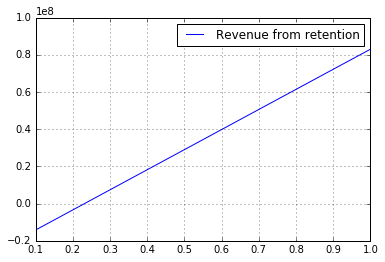

In [9]:
plt.plot(x, y, label="Revenue from retention")
plt.legend()
plt.grid()

Видим, что при коэффициенте успеха меньшем ~0.23 кампания по удержанию перестает быть прибыльной. В этом случае размер топа становится равным нулю. При _p_ > 0.23 размер топа не зависит от параметра и остается равным _d / k_

Аналогичная ситуация будет, если строить график зависимости прибыли от вложенной в удержание суммы, только угол наклона отрицательный.

4\. Всегда ли применение модели экономически оправданно? Приведите пример набора значений параметров, при которых применение модели перестает быть оправданным.

#### Ответ:
При _apk < b_ затраты на удержание одного пользователя становятся слишком высоки. Почему, становится понятно из объяснений и графика в пункте 3.

Поэтому имеет смысл улучшать параметры _p_ и _k_.

5\. Оцените изменение экономического эффекта от проведения кампании по удержанию при увеличении качества модели на 1%? На 3%? При ответе на вопрос укажите, по какой метрике вы оцениваете качество.

In [5]:
#Ответ:
k = 0.73
print a * p * N * c * k - b * N * c - R
k = 0.75
print a * p * N * c * k - b * N * c - R

495000.0
1485000.0


Увеличение качества модели на каждый процент дает прибавку в 495 тыс рублей при наших параметрах.
Качество оценивал по метрике AUC-PRC, хотя в моей экономической модели это не играет роли.

6\. Как вы думаете, является ли экономически оправданным вложение средств в улучшение качества модели? На сколько нужно улучшить модель, чтобы это качественно сказалось на экономическом эффекте от удержания?

1% процент увеличения прибыли уже является качественным улучшением модели. Для оценки в данной задаче возьмем этот процент равным 10.

Таким образом, пусть нам нужно, чтобы прибыль от удержания увеличилась на 10%. 

С нашими исходными параметрами это будет

In [10]:
R_change = R * 0.1
R_change

1064000.0

In [11]:
# для этого нам нужно улучшить нашу модель предсказаний на
k_change = R_change / 495000
k_change

2.1494949494949496

Таким образом, улучшение модели предсказаний всего лишь чуть более, чем на 2%, дает увеличение прибыли от удержания 10%
А в целом по предложенной экономической модели чем лучше качество алгоритма предсказания, тем больше эффект, причем линейно, поэтому вложение однозначно себя оправдывает. Качественно скажется даже сколь угодно малое улучшение модели. 
Конечно, это не совсем правильная модель и в реальности зависимости гораздо сложнее, но авторы этой недели не предложили никаких опорных пунктов и указаний, как нужно связывать экономическую модель с исходным алгоритмом предсказаний. Надеюсь, ближайшее время еще займусь выяснением этого вопроса, но видимо уже не в рамках сдачи задания.